In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo

In [3]:
adult = fetch_ucirepo(id=2)

In [4]:
df= pd.concat([adult.data.features, adult.data.targets],axis=1)

In [5]:
df.shape

(48842, 15)

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## WorkClass, Occupation and native-countryhas NULL

In [9]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df)

,Total,Percent
occupation,966,0.019778
workclass,963,0.019717
native-country,274,0.005610
age,0,0.000000
fnlwgt,0,0.000000
education,0,0.000000
education-num,0,0.000000
marital-status,0,0.000000
relationship,0,0.000000
race,0,0.000000


In [10]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [11]:
df.duplicated().sum()

29

In [12]:
df.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

In [13]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842.0,NaN,NaN,NaN,38.643585,13.71051,17.0,28.0,37.0,48.0,90.0
workclass,47879,9,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48842.0,NaN,NaN,NaN,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,48842.0,NaN,NaN,NaN,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
marital-status,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,47876,15,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48842,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df[['education', 'education-num']].drop_duplicates(subset=['education']).sort_values("education-num").head(16)

,education,education-num
224,Preschool,1
160,1st-4th,2
56,5th-6th,3
15,7th-8th,4
6,9th,5
77,10th,6
3,11th,7
415,12th,8
2,HS-grad,9
10,Some-college,10


In [15]:
df_filter = df[df.isnull().any(axis=1)]
df_filter["income"].value_counts()

<=50K.    1075
>50K.      146
Name: income, dtype: int64

In [16]:
df["income"]=df["income"].str.rstrip('.')

In [17]:
df["income"].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [18]:
pd.set_option('display.max_rows',1500)

In [19]:
df_filtered = df[df["occupation"].isnull() & ((df["capital-gain"] != 0) | (df["capital-loss"] != 0))].head(1000)

# Display the result
df_filtered.count()

age               94
workclass          0
fnlwgt            94
education         94
education-num     94
marital-status    94
occupation         0
relationship      94
race              94
sex               94
capital-gain      94
capital-loss      94
hours-per-week    94
native-country    94
income            94
dtype: int64

In [20]:
df["income"].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

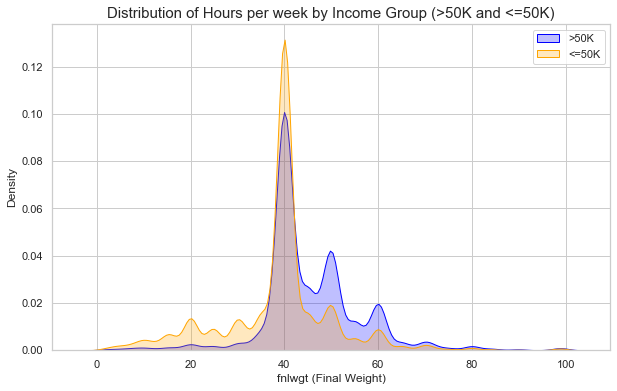

In [22]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.kdeplot(df[df['income'] == '>50K']['hours-per-week'], fill=True, label='>50K', color='blue')
sns.kdeplot(df[df['income'] == '<=50K']['hours-per-week'], fill=True, label='<=50K', color='orange')

plt.title('Distribution of Hours per week by Income Group (>50K and <=50K)', fontsize=15)
plt.xlabel('fnlwgt (Final Weight)', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.legend()

plt.show()

In [23]:
from scipy import stats

count = len(df)
lessorequal_50k_count = len(df[df['income'] == '<=50K'])
p_sampledata = lessorequal_50k_count / count

# Assumption as per the hyposthesis
p0 = 0.50

# Perform Z-test
n = count
z = (p_sampledata - p0) / ( (p0 * (1 - p0) / n) ** 0.5 )
p_val = stats.norm.cdf(z)

# Print results
print(f"Sample Proportion: {p_sampledata:.4f}")
print(f"Z-Statistic: {z:.4f}")
print(f"P-Value: {p_val:.4f}")

# Interpretation
if p_val < 0.05:
    print("Reject the null hypothesis: There is evidence to suggest that the proportion of employees earning <=$50K is less than 50%.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to suggest that the proportion of employees earning <=$50K is less than 50%.")


Sample Proportion: 0.7607
Z-Statistic: 115.2386
P-Value: 1.0000
Fail to reject the null hypothesis: There is not enough evidence to suggest that the proportion of employees earning <=$50K is less than 50%.


In [24]:
df['fnlwgt'].sum()

9263575662

In [25]:
df[df['income'] == '<=50K']['fnlwgt'].sum()

7060920057

In [26]:
df[df['income'] == '>50K']['fnlwgt'].sum()

2202655605

In [27]:
# Calculate weighted proportion
total_weight = df['fnlwgt'].sum()
weighted_less_equal_50k = df[df['income'] == '<=50K']['fnlwgt'].sum()
weighted_p_sample = weighted_less_equal_50k / total_weight

# Hypothesized proportion
p_0 = 0.50

# Compute the weighted standard error
# Standard error formula for proportions: sqrt(p_0 * (1 - p_0) / n), where n is the total weight
# Here, we use weighted standard error:
weighted_variance = (p_0 * (1 - p_0)) / total_weight
weighted_se = weighted_variance ** 0.5

# Perform the Z-test
z = (weighted_p_sample - p_0) / weighted_se
p_value = stats.norm.cdf(z)

# Print the results
print(f"Weighted Proportion: {weighted_p_sample:.4f}")
print(f"Z-Statistic: {z:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is evidence to suggest that the weighted proportion of employees earning <=$50K is less than 50%.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to suggest that the weighted proportion of employees earning <=$50K is less than 50%.")


Weighted Proportion: 0.7622
Z-Statistic: 50476.8012
P-Value: 1.0000
Fail to reject the null hypothesis: There is not enough evidence to suggest that the weighted proportion of employees earning <=$50K is less than 50%.


In [28]:
from scipy.stats import chi2_contingency

# Create contingency tables
contingency_age = pd.crosstab(df['age'], df['income'])
contingency_marital_status = pd.crosstab(df['marital-status'], df['income'])
contingency_occupation = pd.crosstab(df['occupation'], df['income'])

# Perform Chi-Square Test
chi2_age, p_age, dof_age, ex_age = chi2_contingency(contingency_age)
chi2_marital_status, p_marital_status, dof_marital_status, ex_marital_status = chi2_contingency(contingency_marital_status)
chi2_occupation, p_occupation, dof_occupation, ex_occupation = chi2_contingency(contingency_occupation)

# Print the results
print(f"Chi-Square Test for Age - p-value: {p_age:.4f}")
print(f"Chi-Square Test for Marital Status - p-value: {p_marital_status:.4f}")
print(f"Chi-Square Test for Occupation - p-value: {p_occupation:.4f}")

# Interpretation
alpha = 0.05
print("\nInterpretation:")
if p_age < alpha:
    print("Reject the null hypothesis for Age: There is a significant association between Age and income.")
else:
    print("Fail to reject the null hypothesis for Age: There is no significant association between Age and income.")

if p_marital_status < alpha:
    print("Reject the null hypothesis for Marital Status: There is a significant association between Marital Status and income.")
else:
    print("Fail to reject the null hypothesis for Marital Status: There is no significant association between Marital Status and income.")

if p_occupation < alpha:
    print("Reject the null hypothesis for Occupation: There is a significant association between Occupation and income.")
else:
    print("Fail to reject the null hypothesis for Occupation: There is no significant association between Occupation and income.")


Chi-Square Test for Age - p-value: 0.0000
Chi-Square Test for Marital Status - p-value: 0.0000
Chi-Square Test for Occupation - p-value: 0.0000

Interpretation:
Reject the null hypothesis for Age: There is a significant association between Age and income.
Reject the null hypothesis for Marital Status: There is a significant association between Marital Status and income.
Reject the null hypothesis for Occupation: There is a significant association between Occupation and income.


In [29]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Create sample data
np.random.seed(42)  # For reproducibility
age_groups = np.random.choice(range(18, 70), size=1000)
marital_statuses = np.random.choice(['Married', 'Single', 'Divorced', 'Widowed'], size=1000)
occupations = np.random.choice(['Tech', 'Sales', 'Clerk', 'Manager', 'Other'], size=1000)
income_categories = np.random.choice(['<=50K', '>50K'], size=1000)

df_sample = pd.DataFrame({
    'age': age_groups,
    'marital-status': marital_statuses,
    'occupation': occupations,
    'income': income_categories
})

# Display the first few rows
print("Sample Data:")
print(df_sample.head())

# Create contingency tables
contingency_age = pd.crosstab(df_sample['age'], df_sample['income'])
contingency_marital_status = pd.crosstab(df_sample['marital-status'], df_sample['income'])
contingency_occupation = pd.crosstab(df_sample['occupation'], df_sample['income'])

# Perform Chi-Square Test
chi2_age, p_age, dof_age, ex_age = chi2_contingency(contingency_age)
chi2_marital_status, p_marital_status, dof_marital_status, ex_marital_status = chi2_contingency(contingency_marital_status)
chi2_occupation, p_occupation, dof_occupation, ex_occupation = chi2_contingency(contingency_occupation)

# Print the results
print(f"\nChi-Square Test for Age - p-value: {p_age:.4f}")
print(f"Chi-Square Test for Marital Status - p-value: {p_marital_status:.4f}")
print(f"Chi-Square Test for Occupation - p-value: {p_occupation:.4f}")

# Interpretation
alpha = 0.05
print("\nInterpretation:")
if p_age < alpha:
    print("Reject the null hypothesis for Age: There is a significant association between Age and income.")
else:
    print("Fail to reject the null hypothesis for Age: There is no significant association between Age and income.")

if p_marital_status < alpha:
    print("Reject the null hypothesis for Marital Status: There is a significant association between Marital Status and income.")
else:
    print("Fail to reject the null hypothesis for Marital Status: There is no significant association between Marital Status and income.")

if p_occupation < alpha:
    print("Reject the null hypothesis for Occupation: There is a significant association between Occupation and income.")
else:
    print("Fail to reject the null hypothesis for Occupation: There is no significant association between Occupation and income.")


Sample Data:
   age marital-status occupation income
0   56       Divorced       Tech   >50K
1   69       Divorced      Sales  <=50K
2   46       Divorced      Other   >50K
3   32        Widowed      Other   >50K
4   60        Married      Clerk  <=50K

Chi-Square Test for Age - p-value: 0.3107
Chi-Square Test for Marital Status - p-value: 0.2050
Chi-Square Test for Occupation - p-value: 0.7530

Interpretation:
Fail to reject the null hypothesis for Age: There is no significant association between Age and income.
Fail to reject the null hypothesis for Marital Status: There is no significant association between Marital Status and income.
Fail to reject the null hypothesis for Occupation: There is no significant association between Occupation and income.


In [30]:
contingency_occupation = pd.crosstab(df['occupation'], df['income'])
contingency_occupation

income,<=50K,>50K
occupation,,
?,1652,191
Adm-clerical,4843,768
Armed-Forces,10,5
Craft-repair,4729,1383
Exec-managerial,3178,2908
Farming-fishing,1317,173
Handlers-cleaners,1934,138
Machine-op-inspct,2650,372
Other-service,4719,204


In [31]:
# Create contingency tables
contingency_age = pd.crosstab(df['age'], df['income'])
contingency_age

income,<=50K,>50K
age,,
17,595,0
18,862,0
19,1050,3
20,1112,1
21,1090,6
22,1161,17
23,1307,22
24,1162,44
25,1119,76


In [32]:
contingency_marital_status = pd.crosstab(df['marital-status'], df['income'])
contingency_marital_status

income,<=50K,>50K
marital-status,,
Divorced,5962,671
Married-AF-spouse,23,14
Married-civ-spouse,12395,9984
Married-spouse-absent,570,58
Never-married,15384,733
Separated,1431,99
Widowed,1390,128


In [33]:
chi2_age, p_age, dof_age, ex_age = chi2_contingency(contingency_age)

## Handling Missing Data

In [34]:
df["occupation"].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', nan], dtype=object)

In [117]:
df_occupation_na = df[(df["occupation"]=="?") | (df["occupation"].isnull())] #2809 rows
print("Na or ? records contribution \n",df_occupation_na["income"].value_counts())
print("\n Existing data: \n",df["income"].value_counts())

Na or ? records contribution 
 <=50K    2544
>50K      265
Name: income, dtype: int64

 Existing data: 
 <=50K    37155
>50K     11687
Name: income, dtype: int64


In [95]:
#Impact of Education on Income
df_occupation_na[["education","income"]].drop_duplicates().sort_values("education")

,education,income
23421,10th,>50K
77,10th,<=50K
42925,11th,>50K
346,11th,<=50K
22910,12th,>50K
484,12th,<=50K
160,1st-4th,<=50K
2213,5th-6th,>50K
511,5th-6th,<=50K
61,7th-8th,<=50K


In [115]:
df_occupation_na[["education","sex","income"]].value_counts().sort_values(ascending=False)

education     sex     income
Some-college  Female  <=50K     405
              Male    <=50K     387
HS-grad       Male    <=50K     386
              Female  <=50K     360
Bachelors     Male    <=50K     112
11th          Female  <=50K      90
              Male    <=50K      89
10th          Male    <=50K      83
Bachelors     Female  <=50K      81
7th-8th       Male    <=50K      73
10th          Female  <=50K      63
HS-grad       Male    >50K       50
Assoc-voc     Female  <=50K      45
Bachelors     Male    >50K       39
9th           Male    <=50K      37
Assoc-acdm    Male    <=50K      35
Some-college  Male    >50K       35
7th-8th       Female  <=50K      34
12th          Male    <=50K      32
9th           Female  <=50K      31
Assoc-acdm    Female  <=50K      28
5th-6th       Male    <=50K      28
Masters       Male    <=50K      25
Assoc-voc     Male    <=50K      25
12th          Female  <=50K      24
Bachelors     Female  >50K       21
Masters       Male    >50K       19

In [118]:
# Replace "?" and NaN with "Unknown" as the count of Missing/Bad data is 2809.
df['occupation'] = df['occupation'].replace("?", "Unknown").fillna("Unknown")

In [127]:
df['occupation'].isnull().sum()

0

In [125]:
df['workclass'] = df['workclass'].replace("?","Unknown").fillna("Unknown")

In [128]:
df['workclass'].isnull().sum()

0

In [138]:
df[df['native-country'].isnull()][['race', 'sex', 'marital-status']].drop_duplicates()

,race,sex,marital-status
32580,Asian-Pac-Islander,Male,Married-civ-spouse
32626,White,Female,Never-married
32644,White,Male,Married-civ-spouse
32749,Black,Male,Married-spouse-absent
32814,White,Male,Never-married
32866,Black,Male,Never-married
32981,Other,Male,Married-civ-spouse
33032,White,Male,Divorced
33209,Black,Female,Divorced
33404,White,Female,Married-civ-spouse


In [139]:
df[df['native-country'].isnull()][['race', 'sex']].drop_duplicates()

,race,sex
32580,Asian-Pac-Islander,Male
32626,White,Female
32644,White,Male
32749,Black,Male
32981,Other,Male
33209,Black,Female
33599,Asian-Pac-Islander,Female
39147,Other,Female


In [141]:
df[['race', 'sex','native-country']].drop_duplicates()

,race,sex,native-country
0,White,Male,United-States
3,Black,Male,United-States
4,Black,Female,Cuba
5,White,Female,United-States
6,Black,Female,Jamaica
11,Asian-Pac-Islander,Male,India
14,Asian-Pac-Islander,Male,?
15,Amer-Indian-Eskimo,Male,Mexico
21,Black,Female,United-States
27,Asian-Pac-Islander,Male,South


In [142]:
# Replace "?" and NaN with "Unknown" 
df['native-country'] = df['native-country'].replace("?", "Unknown").fillna("Unknown")

In [143]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [36]:
# Function to plot a boxplot and a histogram along the same scale


def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # X-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

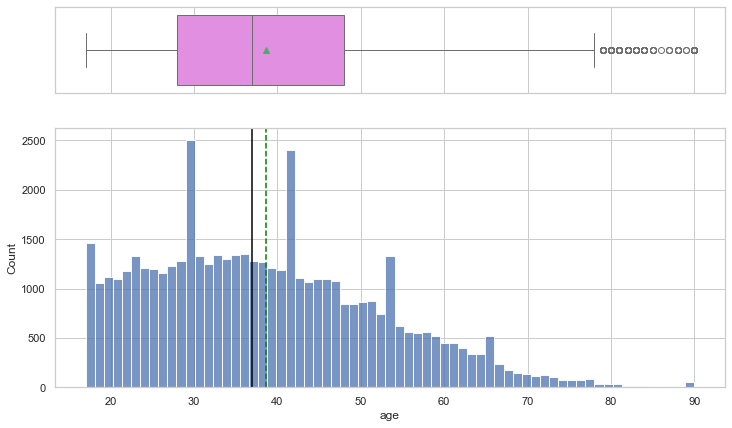

In [37]:
histogram_boxplot(df,"age")

In [111]:
df[df["age"]>78]["age"].value_counts().sort_values()

86     1
89     2
87     3
85     5
88     6
83    11
84    13
82    15
79    30
81    37
80    38
90    55
Name: age, dtype: int64

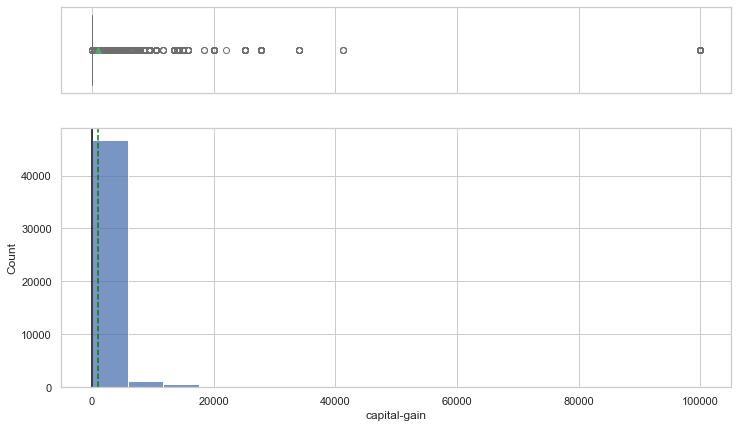

In [38]:
# histogram_boxplot(df,"education-num")
histogram_boxplot(df,"capital-gain")
# capital-loss      94
# hours-per-week    94
# native-country    94
# income            94

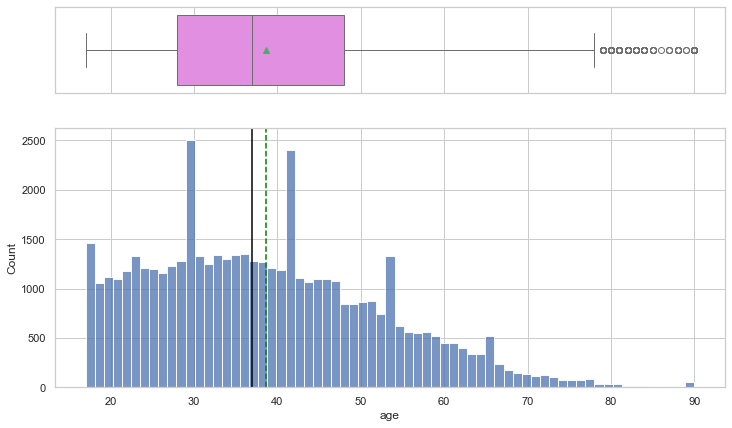

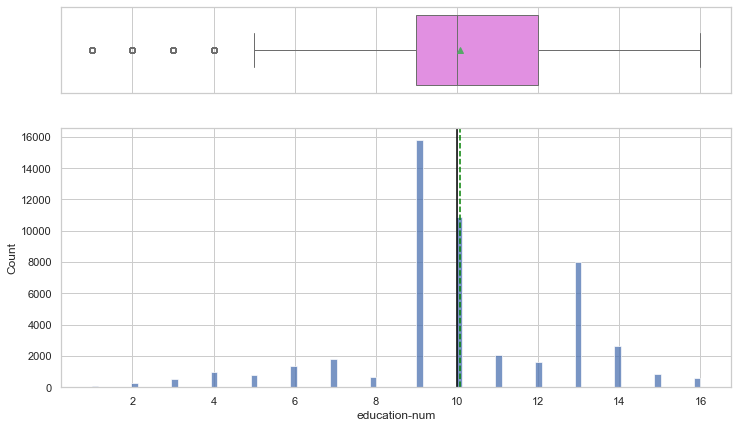

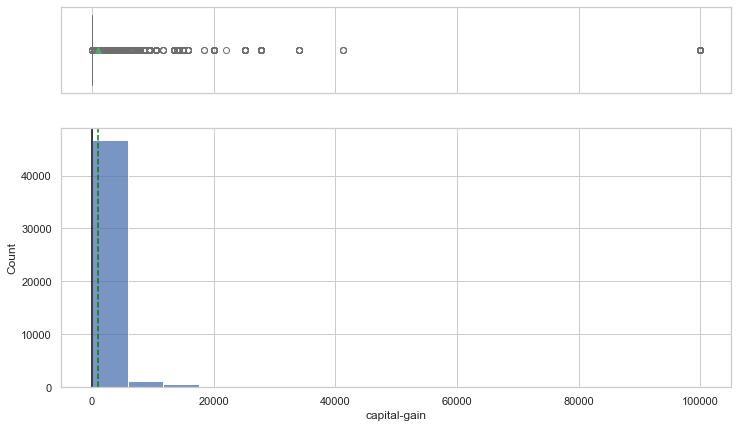

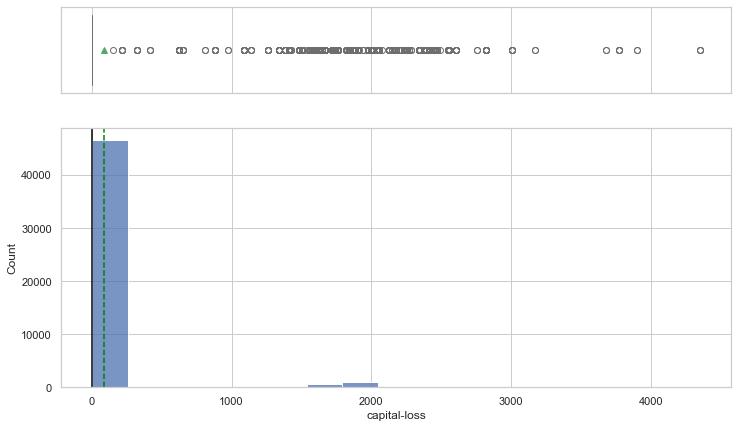

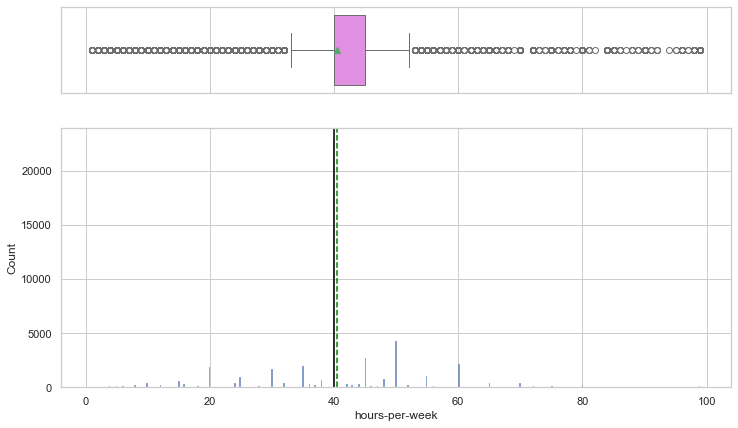

In [46]:
x = ["age","education-num","capital-gain","capital-loss","hours-per-week"]
for i in x:
     histogram_boxplot(df,i)